In [1]:
#import libraries
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sn

#scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#for evaluation
from sklearn.metrics import mean_squared_error


In [2]:
#loading data
data1 = pd.read_csv("GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv")
data1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# data preprocessing

##### renaming columns

In [3]:
#rename columns name
data1.rename({"AverageTemperature":"Avg_Temp","AverageTemperatureUncertainty":"Avg_tepm_uncertainty"},axis=1,inplace=True)

In [4]:
data1.shape

(239177, 7)

In [5]:
data1.columns

Index(['dt', 'Avg_Temp', 'Avg_tepm_uncertainty', 'City', 'Country', 'Latitude',
       'Longitude'],
      dtype='object')

In [6]:
print("\nvalues of longitude")
print(data1["Longitude"].value_counts())
print("\nvalues of latitude")
print(data1["Latitude"].value_counts())


values of longitude
31.38E     6801
77.27E     5226
80.60E     5226
73.51E     4742
116.53E    4636
103.66E    4583
74.56W     3239
0.00W      3239
13.09E     3239
29.19E     3239
4.26W      3239
31.69E     3239
36.85E     3239
80.50W     3239
29.82E     3239
2.45E      3239
72.69W     3239
13.14E     3239
87.27W     3239
26.44E     3129
33.29E     3105
6.70W      3009
30.16E     2669
37.79E     2669
78.70E     2613
72.68E     2613
73.56E     2613
95.44E     2613
75.22E     2613
72.52E     2613
           ... 
112.72E    2085
114.46E    2073
120.63E    2073
144.41E    2073
118.74E    2073
122.36E    2073
151.78E    2073
136.22E    2070
38.94E     2049
46.11E     2049
139.23E    2025
40.98W     2025
120.83E    2025
3.23E      1977
17.50W     1977
3.23W      1977
118.70W    1977
39.73E     1965
38.11E     1965
36.16E     1965
30.42E     1965
45.80E     1965
69.89W     1901
15.27E     1893
13.78E     1893
4.05E      1893
8.22E      1893
18.19E     1881
32.50E     1857
77.26W     1591
Nam

##### change data type

In [7]:
#change data type 

data1["Longitude"] = data1["Longitude"].map(lambda x: x.replace("W"," "))
data1["Longitude"] = data1["Longitude"].map(lambda x: x.replace("E"," "))


data1["Latitude"] = data1["Latitude"].map(lambda x:x.replace("N"," "))
data1["Latitude"] = data1["Latitude"].map(lambda x:x.replace("S"," "))

In [8]:
data1.head(60)

,dt,Avg_Temp,Avg_tepm_uncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,3.23
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,3.23
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,3.23
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,3.23
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,3.23
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63,3.23
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63,3.23
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63,3.23
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63,3.23
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63,3.23


##### treating null values

In [9]:
data1.isnull().sum()

dt                          0
Avg_Temp                11002
Avg_tepm_uncertainty    11002
City                        0
Country                     0
Latitude                    0
Longitude                   0
dtype: int64

In [10]:
data1[data1["Avg_Temp"].isnull()]

,dt,Avg_Temp,Avg_tepm_uncertainty,City,Country,Latitude,Longitude
36,1852-01-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
37,1852-02-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
38,1852-03-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
39,1852-04-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
40,1852-05-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
41,1852-06-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
42,1852-07-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
43,1852-08-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
44,1852-09-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23
45,1852-10-01,NaN,NaN,Abidjan,Côte D'Ivoire,5.63,3.23


In [11]:
data1["City"].value_counts().head(60)

Montreal            3239
Madrid              3239
Saint Petersburg    3239
Moscow              3239
Berlin              3239
Paris               3239
Chicago             3239
New York            3239
Istanbul            3239
Rome                3239
Toronto             3239
Kiev                3239
London              3239
Izmir               3129
Ankara              3105
Casablanca          3009
Aleppo              2669
Alexandria          2669
Nagpur              2613
Dhaka               2613
Madras              2613
Hyderabad           2613
Delhi               2613
Bombay              2613
Kanpur              2613
Karachi             2613
Surat               2613
Lakhnau             2613
New Delhi           2613
Jaipur              2613
Rangoon             2613
Calcutta            2613
Bangalore           2613
Pune                2613
Ahmadabad           2613
Cairo               2460
Gizeh               2460
Bangkok             2371
Lahore              2371
Faisalabad          2371


In [19]:
#data1[data1["City"] == "Karachi"]  

In [13]:
data1["Longitude"].value_counts()

31.38      6801
77.27      5226
80.60      5226
73.51      4742
116.53     4636
103.66     4583
77.26      4204
3.23       3954
80.50      3239
29.82      3239
2.45       3239
72.69      3239
13.09      3239
74.56      3239
87.27      3239
29.19      3239
31.69      3239
4.26       3239
36.85      3239
13.14      3239
0.00       3239
26.44      3129
33.29      3105
6.70       3009
30.16      2669
37.79      2669
80.09      2613
88.25      2613
75.22      2613
73.56      2613
           ... 
126.10     2097
112.72     2085
117.35     2085
107.08     2085
114.46     2073
118.74     2073
151.78     2073
144.41     2073
120.63     2073
122.36     2073
136.22     2070
38.94      2049
46.11      2049
139.23     2025
120.83     2025
40.98      2025
17.50      1977
118.70     1977
30.42      1965
39.73      1965
38.11      1965
45.80      1965
36.16      1965
69.89      1901
4.05       1893
13.78      1893
15.27      1893
8.22       1893
18.19      1881
32.50      1857
Name: Longitude, Length:

##### drop all nan values

In [14]:
data1.dropna(inplace=True)
print(f"\nshape of data: {data1.shape}")
print(f"\nchecking null values: {data1.isnull().sum()}")


shape of data: (228175, 7)

checking null values: dt                      0
Avg_Temp                0
Avg_tepm_uncertainty    0
City                    0
Country                 0
Latitude                0
Longitude               0
dtype: int64


# data visualization

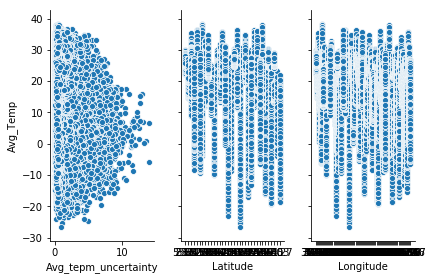

In [15]:
sn.pairplot(data1,x_vars=["Avg_tepm_uncertainty","Latitude","Longitude"],y_vars="Avg_Temp",height=4,aspect=0.5)

In [16]:
features = ["Latitude","Longitude","Avg_Temp"]

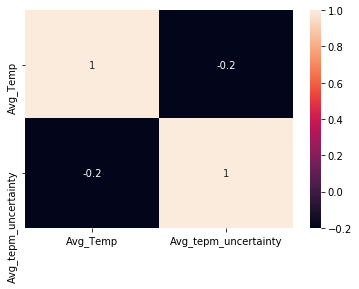

In [17]:
sn.heatmap(data1.corr(),annot=True)

In [18]:
data1.corr()

,Avg_Temp,Avg_tepm_uncertainty
Avg_Temp,1.00000,-0.19938
Avg_tepm_uncertainty,-0.19938,1.00000
